<a href="https://colab.research.google.com/github/mayajsv/AnaliseExploratoria/blob/main/Perfil_do_Profissional_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
# Instalando o wget para capturar as informações do csv no repositório do github
!pip install wget
!wget https://raw.githubusercontent.com/mayajsv/AnaliseExploratoria/main/datahackers-survey-2019-anonymous-responses.csv

--2022-02-03 23:01:19--  https://raw.githubusercontent.com/mayajsv/AnaliseExploratoria/main/datahackers-survey-2019-anonymous-responses.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1169019 (1.1M) [text/plain]
Saving to: ‘datahackers-survey-2019-anonymous-responses.csv.1’

datahackers-survey- 100%[===================>]   1.11M  --.-KB/s    in 0.06s   

2022-02-03 23:01:20 (17.3 MB/s) - ‘datahackers-survey-2019-anonymous-responses.csv.1’ saved [1169019/1169019]



In [ ]:
# Criando um DataFrame chamado 'df' que receberá os dados carregados do csv
df = pd.read_csv('datahackers-survey-2019-anonymous-responses.csv')

df.head()

,"('P0', 'id')","('P1', 'age')","('P2', 'gender')","('P3', 'living_in_brasil')","('P5', 'living_state')","('P6', 'born_or_graduated')","('P8', 'degreee_level')","('P10', 'job_situation')","('P12', 'workers_number')","('P13', 'manager')","('P16', 'salary_range')","('P17', 'time_experience_data_science')","('P18', 'time_experience_before')","('P19', 'is_data_science_professional')","('P20', 'linear_regression')","('P20', 'logistic_regression')","('P20', 'glms')","('P20', 'decision_tree')","('P20', 'random_forest')","('P20', 'neural_networks')","('P20', 'bayesian_inference')","('P20', 'ensemble')","('P20', 'svms')","('P20', 'cnns')","('P20', 'rnns')","('P20', 'hmms')","('P20', 'gans')","('P20', 'markov_chains')","('P20', 'nlp')","('P20', 'gradient_boosted_machines')","('P20', 'cluster_analysis')","('P20', 'survival_analysis')","('P20', 'longitudinal_data_analysis')","('P20', 'joint analysis')","('P20', 'no_listed_methods')","('P21', 'sql_')","('P21', 'r')","('P21', 'python')","('P21', 'c_c++_c#')","('P21', 'dotnet')",...,"('P30', 'microsoft_azure')","('P30', 'do_not_know')","('P30', 'other')","('P31', 'data_hackers_blog')","('P31', 'data_hackers_podcast')","('P31', 'weekly_newsletter')","('P31', 'slack_channel')","('P31', 'data_hackers_bootcamp')","('P31', 'do_not_know_data_hackers')","('P32', 'prefered_data_hackers_initiative')","('P33', 'telegram_groups')","('P33', 'whatsapp_groups')","('P33', 'youtube_channels')","('P33', 'other_brasilian_blogs')","('P33', 'other_slack_channels')","('P33', 'twitter')","('P33', 'abroad_blogs')","('P33', 'abroad_podcasts')","('P33', 'meetups_and_events')","('P33', 'only_data_hackers')","('P33', 'other')","('P34', 'udacity')","('P34', 'coursera')","('P34', 'udemy')","('P34', 'height')","('P34', 'edx')","('P34', 'data_camp')","('P34', 'data_quest')","('P34', 'kaggle_learn')","('P34', 'online_courses')","('P34', 'other')","('P35', 'data_science_plataforms_preference')","('P35', 'other')","('P36', 'draw_participation')","('D1', 'living_macroregion')","('D2', 'origin_macroregion')","('D3', 'anonymized_degree_area')","('D4', 'anonymized_market_sector')","('D5', 'anonymized_manager_level')","('D6', 'anonymized_role')"
0,v9otv8j9wdvjrv9otvwnn9owhzq54ktv,37.0,Masculino,1,Minas Gerais (MG),1.0,Estudante de Graduação,Empregado (CTL),de 1 a 5,0.0,de R$ 1.001/mês a R$ 2.000/mês,Não tenho experiência na área de dados,Não tive experiência na área de TI/Engenharia ...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,Ainda não conhecia o Data Hackers,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,Nunca fiz cursos online,NaN,1.0,Região Sudeste,NaN,Computação / Engenharia de Software / Sistemas...,Outras,NaN,Outras
1,875ul998t0hqcv0871uptwf3oswcfv35,24.0,Feminino,1,São Paulo (SP),1.0,Estudante de Graduação,Empregado (CTL),Acima de 3000,0.0,de R$ 2.001/mês a R$ 3000/mês,Menos de 1 ano,Não tive experiência na área de TI/Engenharia ...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,Ainda não conhecia o Data Hackers,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,NaN,Data Science Academy,0.0,Região Sudeste,NaN,Computação / Engenharia de Software / Sistemas...,Educação,NaN,Data Analyst/Analista de Dados
2,puscuk079vw1pusbb900pzw2xvpxtgdk,26.0,Masculino,1,São Paulo (SP),1.0,Graduação/Bacharelado,Empregado (CTL),Acima de 3000,0.0,de R$ 4.001/mês a R$ 6.000/mês,de 1 a 2 anos,de 6 a 10 anos,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,Newsletter Semanal,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,Udemy,NaN,1.0,Região Sudeste,NaN,Outras Engenharias,Indústria (Manufatura),NaN,Outras
3,rmel8ewqpbffp2mnfbzermel8eqincov,21.0,Masculino,1,São Paulo (SP),0.0,Estudante de Graduação,Estagiário,de 11 a 50,0.0,de R$ 1.001/mês a R$ 2.000/mês,Menos de 1 ano,de 2 a 3 anos,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,Ainda não conhecia o Data Hackers,0,1,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,Alura,NaN,1.0,Região Sudeste,Região Sudeste,

In [ ]:
#Verificando a dimenção dos dados em linhas e colunas
df.shape

(1765, 170)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1765 entries, 0 to 1764
Columns: 170 entries, ('P0', 'id') to ('D6', 'anonymized_role')
dtypes: float64(5), int64(146), object(19)
memory usage: 2.3+ MB


In [ ]:
#Verificação de dados faltantes, somando as quantidades
df.isnull().sum()

('P0', 'id')                             0
('P1', 'age')                           24
('P2', 'gender')                         3
('P3', 'living_in_brasil')               0
('P5', 'living_state')                 337
                                      ... 
('D2', 'origin_macroregion')          1440
('D3', 'anonymized_degree_area')        35
('D4', 'anonymized_market_sector')     243
('D5', 'anonymized_manager_level')    1460
('D6', 'anonymized_role')              514
Length: 170, dtype: int64

In [ ]:
#Calculando a média dos dados faltantes, ordenanos pelo 'sort_values'
df.isnull().mean()[df.isnull().mean() != 0].sort_values

<bound method Series.sort_values of ('P1', 'age')                                    0.013598
('P2', 'gender')                                 0.001700
('P5', 'living_state')                           0.190935
('P6', 'born_or_graduated')                      0.019263
('P12', 'workers_number')                        0.134844
('P13', 'manager')                               0.134844
('P16', 'salary_range')                          0.134844
('P22', 'most_used_proggraming_languages')       0.486686
('P29', 'have_data_warehouse')                   0.550708
('P35', 'data_science_plataforms_preference')    0.079320
('P35', 'other')                                 0.920680
('P36', 'draw_participation')                    0.002266
('D1', 'living_macroregion')                     0.190935
('D2', 'origin_macroregion')                     0.815864
('D3', 'anonymized_degree_area')                 0.019830
('D4', 'anonymized_market_sector')               0.137677
('D5', 'anonymized_manager_level')  

In [ ]:
# Quais e quantos tipos de profissionais que efetuaram a pesquisa ? 
df["('D6', 'anonymized_role')"].value_counts()

Desenvolvedor ou Engenheiro de Software    225
Outras                                     220
Data Scientist/Cientista de Dados          167
Data Analyst/Analista de Dados             163
Business Intelligence/Analista de BI       150
Data Engineer/Engenheiro de Dados          130
Business Analyst/Analista de Negócios       72
Analista de Inteligência de Mercado         29
Engenheiro                                  26
Analista de Marketing                       19
Engenheiro de Machine Learning              15
DBA/Administrador de Banco de Dados         14
Estatístico                                 11
Economista                                  10
Name: ('D6', 'anonymized_role'), dtype: int64

In [ ]:
# Mapeamento de variáriaveis, agrupando sobre o tipo em comum em si

profmap = {  'Desenvolvedor ou Engenheiro de Software' : 'Desenvolvedor/Engenheiro de Software',
                                            'Outras'   :  'Outras',                               
                  'Data Scientist/Cientista de Dados'  :  'Cientista de Dados',   
                      'Data Analyst/Analista de Dados' :  'Analista de Dados',
                'Business Intelligence/Analista de BI' :  'Analista de BI',
                  'Data Engineer/Engenheiro de Dados'  :  'Engenheiro de Dados',
               'Business Analyst/Analista de Negócios' :  'Analista de BI',
                 'Analista de Inteligência de Mercado' :  'Analista de BI',
                                         'Engenheiro'  :   'Outras',                                
                              'Analista de Marketing'  :   'Outras',                    
                      'Engenheiro de Machine Learning' :   'Cientista de Dados',       
                'DBA/Administrador de Banco de Dados'  :   'Engenheiro de Dados',
                                      'Estatístico'    :   'Cientista de Dados',                        
                                      'Economista'     :    'Outras'}

df['profissao'] = df["('D6', 'anonymized_role')"].map(profmap)

In [ ]:
df['profissao'].value_counts()

Outras                                  275
Analista de BI                          251
Desenvolvedor/Engenheiro de Software    225
Cientista de Dados                      193
Analista de Dados                       163
Engenheiro de Dados                     144
Name: profissao, dtype: int64

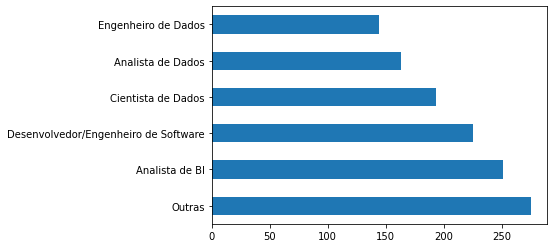

In [ ]:
df['profissao'].value_counts().plot(kind = 'barh')

In [ ]:
df["('P16', 'salary_range')"].value_counts()

de R$ 4.001/mês a R$ 6.000/mês      308
de R$ 8.001/mês a R$ 12.000/mês     237
de R$ 6.001/mês a R$ 8.000/mês      229
de R$ 3.001/mês a R$ 4.000/mês      219
de R$ 1.001/mês a R$ 2.000/mês      181
de R$ 2.001/mês a R$ 3000/mês       150
de R$ 12.001/mês a R$ 16.000/mês     82
Menos de R$ 1.000/mês                48
de R$ 16.001/mês a R$ 20.000/mês     45
de R$ 20.001/mês a R$ 25.000/mês     15
Acima de R$ 25.001/mês               13
Name: ('P16', 'salary_range'), dtype: int64

In [30]:
#Qual a média do salário dentro da faixa selecionada?
# Numerizar variável categorica

#pré processamento básico, criando váriaveis mais convenientes.

#tamanho da empresa
tammap = { 'de 1 a 5' : 'Pequena',
             'de 6 a 10' : 'Pequena',
             'de 11 a 50' : 'Pequena',
             'de 51 a 100' : 'Pequena',
             'de 101 a 500' : 'Média',
             'de 501 a 1000' : 'Média',
             'de 1001 a 3000' : 'Grande'}

#salarios
salamap= { 'Menos de R$ 1.000/mês': 1000,
      'de R$ 1.001/mês a R$ 2.000/mês': 1500, 
       'de R$ 2.001/mês a R$ 3000/mês': 2500,
      'de R$ 3.001/mês a R$ 4.000/mês': 3500,
      'de R$ 4.001/mês a R$ 6.000/mês': 5000, 
      'de R$ 6.001/mês a R$ 8.000/mês': 7000,
     'de R$ 8.001/mês a R$ 12.000/mês': 10000,
    'de R$ 12.001/mês a R$ 16.000/mês': 14000,
    'de R$ 16.001/mês a R$ 20.000/mês': 18000,
    'de R$ 20.001/mês a R$ 25.000/mês': 22500, 
              'Acima de R$ 25.001/mês': 25000}

# discretização da idade (escolha arbitraria dos cortes)
cortes = [0, 24, 30, 40, 100]
nomes = ['[18,24]', '[25,30]', '[31,40]', '[41,50]']

# criando um novo dataset com as informações de maior interesse 

df['idade'] = pd.cut(df["('P1', 'age')"], bins = cortes, labels = nomes)

df['salario'] = df["('P16', 'salary_range')"].map(salamap)  
df['tamanho_da_empresa'] = df["('P12', 'workers_number')"].map(tammap) 

df['gestor'] = df["('P13', 'manager')"].map({0: 'não', 1: 'sim'})
df['se_considera_ds'] = df["('P19', 'is_data_science_professional')"].map({0: 'não', 1: 'sim'})

df['sexo'] = df["('P2', 'gender')"]
df['experiencia_ds'] = df["('P17', 'time_experience_data_science')"]
df['tipo_de_trabalho'] = df["('P10', 'job_situation')"]
df['escolaridade'] = df["('P8', 'degreee_level')"]
df['area_de_formacao'] = df["('D3', 'anonymized_degree_area')"]
df['setor_de_mercado'] = df["('D4', 'anonymized_market_sector')"]
df['plataforma_favorita'] = df["('P35', 'data_science_plataforms_preference')"] 

df.head()

,"('P0', 'id')","('P1', 'age')","('P2', 'gender')","('P3', 'living_in_brasil')","('P5', 'living_state')","('P6', 'born_or_graduated')","('P8', 'degreee_level')","('P10', 'job_situation')","('P12', 'workers_number')","('P13', 'manager')","('P16', 'salary_range')","('P17', 'time_experience_data_science')","('P18', 'time_experience_before')","('P19', 'is_data_science_professional')","('P20', 'linear_regression')","('P20', 'logistic_regression')","('P20', 'glms')","('P20', 'decision_tree')","('P20', 'random_forest')","('P20', 'neural_networks')","('P20', 'bayesian_inference')","('P20', 'ensemble')","('P20', 'svms')","('P20', 'cnns')","('P20', 'rnns')","('P20', 'hmms')","('P20', 'gans')","('P20', 'markov_chains')","('P20', 'nlp')","('P20', 'gradient_boosted_machines')","('P20', 'cluster_analysis')","('P20', 'survival_analysis')","('P20', 'longitudinal_data_analysis')","('P20', 'joint analysis')","('P20', 'no_listed_methods')","('P21', 'sql_')","('P21', 'r')","('P21', 'python')","('P21', 'c_c++_c#')","('P21', 'dotnet')",...,"('P33', 'other_brasilian_blogs')","('P33', 'other_slack_channels')","('P33', 'twitter')","('P33', 'abroad_blogs')","('P33', 'abroad_podcasts')","('P33', 'meetups_and_events')","('P33', 'only_data_hackers')","('P33', 'other')","('P34', 'udacity')","('P34', 'coursera')","('P34', 'udemy')","('P34', 'height')","('P34', 'edx')","('P34', 'data_camp')","('P34', 'data_quest')","('P34', 'kaggle_learn')","('P34', 'online_courses')","('P34', 'other')","('P35', 'data_science_plataforms_preference')","('P35', 'other')","('P36', 'draw_participation')","('D1', 'living_macroregion')","('D2', 'origin_macroregion')","('D3', 'anonymized_degree_area')","('D4', 'anonymized_market_sector')","('D5', 'anonymized_manager_level')","('D6', 'anonymized_role')",profissao,idade,salario,tamanho_da_empresa,gestor,se_considera_ds,sexo,experiencia_ds,tipo_de_trabalho,escolaridade,area_de_formacao,setor_de_mercado,plataforma_favorita
0,v9otv8j9wdvjrv9otvwnn9owhzq54ktv,37.0,Masculino,1,Minas Gerais (MG),1.0,Estudante de Graduação,Empregado (CTL),de 1 a 5,0.0,de R$ 1.001/mês a R$ 2.000/mês,Não tenho experiência na área de dados,Não tive experiência na área de TI/Engenharia ...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,Nunca fiz cursos online,NaN,1.0,Região Sudeste,NaN,Computação / Engenharia de Software / Sistemas...,Outras,NaN,Outras,Outras,"[31,40]",1500.0,Pequena,não,não,Masculino,Não tenho experiência na área de dados,Empregado (CTL),Estudante de Graduação,Computação / Engenharia de Software / Sistemas...,Outras,Nunca fiz cursos online
1,875ul998t0hqcv0871uptwf3oswcfv35,24.0,Feminino,1,São Paulo (SP),1.0,Estudante de Graduação,Empregado (CTL),Acima de 3000,0.0,de R$ 2.001/mês a R$ 3000/mês,Menos de 1 ano,Não tive experiência na área de TI/Engenharia ...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,NaN,Data Science Academy,0.0,Região Sudeste,NaN,Computação / Engenharia de Software / Sistemas...,Educação,NaN,Data Analyst/Analista de Dados,Analista de Dados,"[18,24]",2500.0,NaN,não,sim,Feminino,Menos de 1 ano,Empregado (CTL),Estudante de Graduação,Computação / Engenharia de Software / Sistemas...,Educação,NaN
2,puscuk079vw1pusbb900pzw2xvpxtgdk,26.0,Masculino,1,São Paulo (SP),1.0,Graduação/Bacharelado,Empregado (CTL),Acima de 3000,0.0,de R$ 4.001/mês a R$ 6.000/mês,de 1 a 2 anos,de 6 a 10 anos,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,Udemy,NaN,1.0,Região Sudeste,NaN,Outras Engenharias,Indústria (Manufatura),NaN,Outras,Outras,"[25,30]",5000.0,NaN,não,sim,Masculino,de 1 a 2 anos,Empregado (CTL),Graduação/Bacharelado,Outras Engenharias,Indústria (Manufatura),Udemy
3,rmel8ewqpbffp2mnfbzermel8eqincov,21.0,Masculino,1,São Paulo (SP),0.0,Estudante de Graduação,Estagiário,de 11 a 50,0.0,de R$ 1.001/mês a R$ 2.000/mês,Menos de 1 ano,de 2 a 3 anos,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,...,0,

In [34]:
df.groupby(['profissao']).mean()['salario'].round(2)

profissao
Analista de BI                          4978.09
Analista de Dados                       5036.81
Cientista de Dados                      6831.61
Desenvolvedor/Engenheiro de Software    5133.33
Engenheiro de Dados                     7802.08
Outras                                  4854.55
Name: salario, dtype: float64

In [35]:
df.groupby(['idade']).mean()['salario'].round(2)

idade
[18,24]    3083.33
[25,30]    5466.37
[31,40]    8417.16
[41,50]    9590.91
Name: salario, dtype: float64

In [37]:
df['salario'].groupby(df['idade']).mean().round(2)

idade
[18,24]    3083.33
[25,30]    5466.37
[31,40]    8417.16
[41,50]    9590.91
Name: salario, dtype: float64

In [38]:
df.groupby(['experiencia_ds']).mean()['salario'].round(2)

experiencia_ds
Mais de 10 anos                           10711.54
Menos de 1 ano                             3961.64
Não tenho experiência na área de dados     4648.15
de 1 a 2 anos                              5125.41
de 2 a 3 anos                              6290.75
de 4 a 5 anos                              8374.25
de 6 a 10 anos                             9384.39
Name: salario, dtype: float64

In [39]:
cientista_dados = df[df['profissao'] == 'Cientista de Dados']

In [40]:
cientista_dados.groupby(['experiencia_ds']).mean()['salario'].round(2)

experiencia_ds
Mais de 10 anos                           10409.09
Menos de 1 ano                             3675.00
Não tenho experiência na área de dados     2500.00
de 1 a 2 anos                              5333.33
de 2 a 3 anos                              6704.55
de 4 a 5 anos                             10648.15
de 6 a 10 anos                            12923.08
Name: salario, dtype: float64

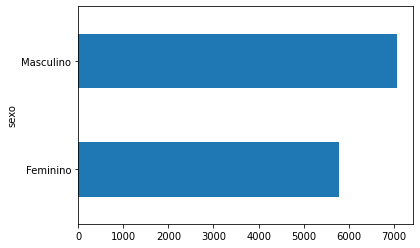

In [43]:
cientista_dados.groupby(['sexo']).mean()['salario'].round(2).plot(kind = 'barh')

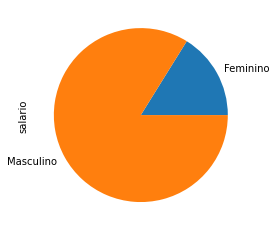

In [45]:
cientista_dados.groupby(['sexo']).count()['salario'].round(2).plot(kind = 'pie')

In [48]:
cientista_dados.groupby(['tamanho_da_empresa']).mean()['salario'].round(2)

tamanho_da_empresa
Grande     8000.00
Média      7260.27
Pequena    4903.51
Name: salario, dtype: float64

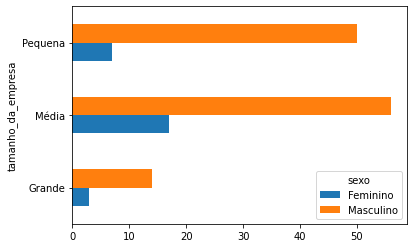

In [52]:
cientista_dados.groupby(['tamanho_da_empresa', 'sexo']).count()['salario'].round(2).unstack().plot(kind= 'barh')

In [53]:
cientista_dados.groupby(['tamanho_da_empresa', 'sexo']).count()['salario']

tamanho_da_empresa  sexo     
Grande              Feminino      3
                    Masculino    14
Média               Feminino     17
                    Masculino    56
Pequena             Feminino      7
                    Masculino    50
Name: salario, dtype: int64

In [57]:
sexo_empresa = cientista_dados.groupby(['tamanho_da_empresa', 'sexo']).mean()['salario'].round(2).unstack()

In [58]:
sexo_empresa['Proporção'] = sexo_empresa['Feminino']/sexo_empresa['Masculino']

In [59]:
sexo_empresa

sexo,Feminino,Masculino,Proporção
tamanho_da_empresa,,,
Grande,9666.67,7642.86,1.264797
Média,5352.94,7839.29,0.682835
Pequena,3785.71,5060.00,0.748164


In [60]:
cientista_dados.groupby(['escolaridade']).mean()['salario'].round(2)

escolaridade
Doutorado ou Phd              13500.00
Estudante de Graduação         3363.64
Graduação/Bacharelado          5459.68
Mestrado                       7918.60
Não tenho graduação formal     6416.67
Pós-graduação                  8986.84
Name: salario, dtype: float64

In [62]:
cientista_dados.groupby(['escolaridade']).describe()['salario'].round(2)

,count,mean,std,min,25%,50%,75%,max
escolaridade,,,,,,,,
Doutorado ou Phd,11.0,13500.00,7221.50,5000.0,10000.0,10000.0,18250.0,25000.0
Estudante de Graduação,33.0,3363.64,3939.53,1000.0,1500.0,2500.0,3500.0,22500.0
Graduação/Bacharelado,62.0,5459.68,3075.95,1000.0,3500.0,5000.0,7000.0,18000.0
Mestrado,43.0,7918.60,3387.53,1500.0,5000.0,7000.0,10000.0,18000.0
Não tenho graduação formal,6.0,6416.67,6053.24,1000.0,3125.0,5000.0,6500.0,18000.0
Pós-graduação,38.0,8986.84,4638.98,2500.0,5000.0,7000.0,10000.0,22500.0


In [68]:
cientista_dados[cientista_dados['escolaridade'] == 'Não tenho graduação formal']['salario']

165      2500.0
536      7000.0
626      5000.0
1142     5000.0
1290    18000.0
1764     1000.0
Name: salario, dtype: float64

In [69]:
cientista_dados["('P21', 'python')"].mean()

0.8963730569948186

In [72]:
cientista_dados.filter(regex = 'P21').mean().sort_values(ascending = False)

('P21', 'python')                 0.896373
('P21', 'sql_')                   0.730570
('P21', 'r')                      0.383420
('P21', 'sas_stata')              0.088083
('P21', 'scala')                  0.082902
('P21', 'visual_basic_vba')       0.051813
('P21', 'java')                   0.041451
('P21', 'c_c++_c#')               0.031088
('P21', 'matlab')                 0.025907
('P21', 'dotnet')                 0.010363
('P21', 'julia')                  0.010363
('P21', 'php')                    0.005181
('P21', 'no_listed_languages')    0.000000
dtype: float64

In [73]:
cientista_dados.filter(regex = 'P20').mean().sort_values(ascending = False)

('P20', 'linear_regression')             0.740933
('P20', 'logistic_regression')           0.673575
('P20', 'decision_tree')                 0.652850
('P20', 'random_forest')                 0.647668
('P20', 'cluster_analysis')              0.601036
('P20', 'neural_networks')               0.461140
('P20', 'gradient_boosted_machines')     0.445596
('P20', 'ensemble')                      0.398964
('P20', 'nlp')                           0.352332
('P20', 'bayesian_inference')            0.321244
('P20', 'svms')                          0.305699
('P20', 'glms')                          0.290155
('P20', 'rnns')                          0.181347
('P20', 'longitudinal_data_analysis')    0.176166
('P20', 'cnns')                          0.165803
('P20', 'markov_chains')                 0.134715
('P20', 'survival_analysis')             0.134715
('P20', 'joint analysis')                0.067358
('P20', 'gans')                          0.046632
('P20', 'hmms')                          0.041451


In [74]:
cientista_dados.filter(regex = 'P27').mean().sort_values(ascending = False)

('P27', 'microsoft_powerbi')               0.336788
('P27', 'no_bi_tool_at_work')              0.217617
('P27', 'metabase')                        0.186528
('P27', 'tableau')                         0.176166
('P27', 'google_data_studio')              0.134715
('P27', 'qlik_view_qlik_sense')            0.088083
('P27', 'only_excel_gsheets')              0.077720
('P27', 'other')                           0.077720
('P27', 'redash')                          0.041451
('P27', 'ibm_analytics_cognos')            0.025907
('P27', 'superset')                        0.020725
('P27', 'microstrategy')                   0.020725
('P27', 'looker')                          0.015544
('P27', 'sap_business_objects')            0.005181
('P27', 'oracle_business_intelligence')    0.005181
('P27', 'birst')                           0.000000
dtype: float64

In [75]:
analista_bi = df[df['profissao'] == 'Analista de BI']

In [76]:
analista_bi.filter(regex = 'P27').mean().sort_values(ascending = False)

('P27', 'microsoft_powerbi')               0.274900
('P27', 'tableau')                         0.095618
('P27', 'qlik_view_qlik_sense')            0.083665
('P27', 'only_excel_gsheets')              0.079681
('P27', 'other')                           0.063745
('P27', 'metabase')                        0.051793
('P27', 'google_data_studio')              0.043825
('P27', 'microstrategy')                   0.027888
('P27', 'no_bi_tool_at_work')              0.027888
('P27', 'sap_business_objects')            0.023904
('P27', 'ibm_analytics_cognos')            0.019920
('P27', 'superset')                        0.011952
('P27', 'oracle_business_intelligence')    0.007968
('P27', 'looker')                          0.003984
('P27', 'redash')                          0.000000
('P27', 'birst')                           0.000000
dtype: float64

In [77]:
cientista_dados.filter(regex = 'P34').mean().sort_values(ascending = False)

('P34', 'udemy')             0.663212
('P34', 'coursera')          0.632124
('P34', 'udacity')           0.487047
('P34', 'data_camp')         0.393782
('P34', 'edx')               0.300518
('P34', 'kaggle_learn')      0.295337
('P34', 'height')            0.129534
('P34', 'online_courses')    0.056995
('P34', 'data_quest')        0.046632
('P34', 'other')             0.046632
dtype: float64

In [78]:
cientista_dados["('P35\', \'data_science_plataforms_preference\')"].value_counts()

Coursera                   53
Udemy                      38
DataCamp                   33
Udacity                    32
Nunca fiz cursos online    13
edX                         7
Kaggle Learn                6
Alura                       3
DataQuest                   2
Name: ('P35', 'data_science_plataforms_preference'), dtype: int64